In [19]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D,GlobalAveragePooling2D
from keras.layers.advanced_activations import ELU
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import RMSprop, SGD, Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from keras.models import load_model
from keras.preprocessing import image
import numpy as np
import os
import cv2
from os import listdir
from os.path import isfile, join
import re
import matplotlib.pyplot as plt
import sklearn
from sklearn.metrics import classification_report, confusion_matrix
from keras.utils.vis_utils import plot_model
import matplotlib.image as mpimg
%matplotlib inline

In [20]:
num_classes = 4
img_rows, img_cols = 224, 224
batch_size = 16

In [21]:
validation_data_dir = r'D:\OCT20\test'

In [22]:
validation_datagen = ImageDataGenerator(rescale=1./255)

In [23]:
validation_generator = validation_datagen.flow_from_directory(
        validation_data_dir,
        target_size=(img_rows, img_cols),
        batch_size=batch_size,
        class_mode='categorical')

Found 1000 images belonging to 4 classes.


In [24]:
nb_validation_samples = 1000

In [25]:
model = load_model('retinal_mobile.h5')

In [26]:
scores = model.evaluate(validation_generator,steps=nb_validation_samples // batch_size+1, verbose=1)
print('\nTest result: %.3f loss: %.3f' %(scores[1]*100,scores[0]))

63/63 [==============================] - 72s 1s/step - loss: 0.1554 - accuracy: 0.9500

Test result: 95.000 loss: 0.155


In [27]:
validation_generator = validation_datagen.flow_from_directory(
        validation_data_dir,
        target_size=(img_rows, img_cols),
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=False)

Found 1000 images belonging to 4 classes.


In [28]:
class_labels = validation_generator.class_indices
class_labels = {v: k for k, v in class_labels.items()}
classes = list(class_labels.values())

In [29]:
y_pred = model.predict(validation_generator, nb_validation_samples // batch_size+1)

In [30]:
y_pred_label = np.argmax(y_pred, axis=1)

In [31]:
#Confusion Matrix and Classification Report
print('Confusion Matrix')
print(confusion_matrix(validation_generator.classes, y_pred_label))
print('Classification Report')
print(classification_report(validation_generator.classes, y_pred_label, target_names=classes))

Confusion Matrix
[[237   1  12   0]
 [  7 228   9   6]
 [  8   3 239   0]
 [  0   0   4 246]]
Classification Report
              precision    recall  f1-score   support

         CNV       0.94      0.95      0.94       250
         DME       0.98      0.91      0.95       250
      DRUSEN       0.91      0.96      0.93       250
      NORMAL       0.98      0.98      0.98       250

    accuracy                           0.95      1000
   macro avg       0.95      0.95      0.95      1000
weighted avg       0.95      0.95      0.95      1000



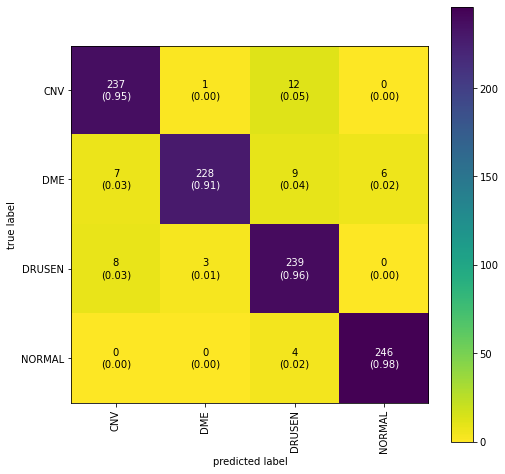

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_confusion_matrix
cnf_matrix=confusion_matrix(validation_generator.classes, y_pred_label)
plot_confusion_matrix(conf_mat=cnf_matrix,figsize=(8,8),show_normed=True)# show norm face si normalizarea
tick_marks = np.arange(len(classes))
_ = plt.xticks(tick_marks, classes, rotation=90)
_ = plt.yticks(tick_marks, classes)

color_map = plt.imshow(cnf_matrix)
color_map.set_cmap('viridis_r')
plt.colorbar()

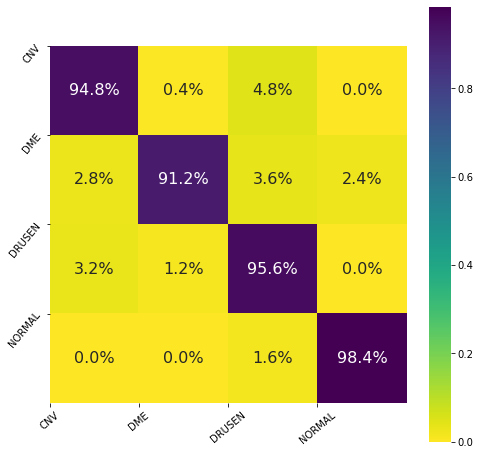

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_confusion_matrix
import seaborn as sns
fig, ax = plt.subplots(figsize=(8, 8))

cnf_matrix=confusion_matrix(validation_generator.classes, y_pred_label)

sns.heatmap(cnf_matrix*4/np.sum(cnf_matrix),annot=True,annot_kws={'size':16}, fmt='.1%', cmap='viridis_r',square=True,)
tick_marks = np.arange(len(classes))
_ = plt.xticks(tick_marks, classes, rotation=40)
_ = plt.yticks(tick_marks, classes, rotation=50)